In [ ]:
import sys

import os
print(os.getcwd())

: 

In [ ]:
# sys.path.append('rl/')
# print(sys.path) 

import rl.utils
from rl.utils import *

2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2024-07-12 18:04:09.244 (   0.000s) [           160AD]      netinterfaces.cpp:91    I

INFO:root:Looking for a Participant stream...


In [ ]:
print(sys.path) 

['/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks', '/opt/homebrew/Caskroom/miniforge/base/lib/python39.zip', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages', '/Users/schnuckiputz/other/code/brain-course-drl-project/gym-grid', '/Users/schnuckiputz/other/git/sam-hq', 'rl/']


In [ ]:
import pandas as pd

  0%|          | 0/200 [00:00<?, ?it/s]/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/ucbq_agent.py:77: RuntimeWarning: invalid value encountered in sqrt
  self.Q[state] + self.ucb_c * np.sqrt(np.divide(np.log(self.t), self.N[state], where=self.N[state]!=0)))
100%|██████████| 200/200 [00:16<00:00, 12.48it/s]


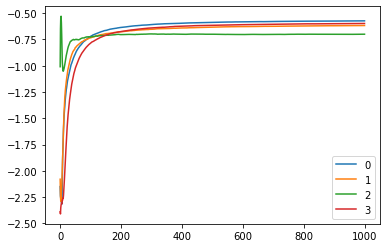

In [ ]:
# UCBQ vanilla

rewards = []

params_new = {
    # Runner parameters
    'max_steps': 1000,
    'num_episodes': 200,
    'convergence_count_start': 1000,
    'epsilon': 0,
    'gamma': 1
    }

params = default_params() | params_new

from ucbq_agent_stateless_validation import UCBQAgent

params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [[get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]]



# E-Greedy

rewards = []

params_new = {
    # 'epsilon': 0.01
    'epsilon': 0.1
    }

params = params | params_new

from e_greedy_agent import EGreedyAgent

params['agent'] = EGreedyAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)

mean_rewards.append([get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards])



# Policy Gradient

rewards = []

from policy_gradient_agent import PolicyGradientAgent

params['agent'] = PolicyGradientAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)

mean_rewards.append([get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards])


df_mean_rewards = pd.DataFrame(mean_rewards[0]).T
df_mean_rewards[1] = pd.DataFrame(mean_rewards[1]).T
df_mean_rewards[2] = pd.DataFrame(mean_rewards[2]).T



# # UCBQ final

# rewards = []

# params_new = {
#     # Runner parameters
#     'max_steps': 1000,
#     'num_episodes': 200,
#     'convergence_count_start': 1000,
#     }

# params = default_params() | params_new

# from ucbq_agent_stateless import UCBQAgent

# params['agent'] = UCBQAgent
# q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
# rewards.append(rewards_all_experiments)

# mean_rewards.append([get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards])

# df_mean_rewards[3] = pd.DataFrame(mean_rewards[3]).T


df_mean_rewards.columns = ['UCBQ', 'E-Greedy', 'Policy Gradient']

df_mean_rewards.plot(legend=True)

In [ ]:
df_mean_rewards

,UCBQ,E-Greedy,Policy Gradient
0,-2.365000,-2.055000,-1.030000
1,-2.355000,-2.142500,-0.655000
2,-2.323333,-2.146667,-0.526667
3,-2.318750,-2.118750,-0.516250
4,-2.344000,-2.094000,-0.577000
...,...,...,...
995,-0.565567,-0.595301,-0.704794
996,-0.565491,-0.595401,-0.704895
997,-0.565521,-0.595431,-0.704860
998,-0.565501,-0.595495,-0.704810


In [ ]:
print_agent_stats(params['agent'] )

Total rewards:


AttributeError: type object 'PolicyGradientAgent' has no attribute 'rewards'